# Image size

In [4]:
from PIL import Image

def get_image_size(file_path):
    try:
        with Image.open(file_path) as img:
            width, height = img.size
            return width, height
    except Exception as e:
        print(f"Error: {e}")
        return None

# Replace 'your_image.png' with the path to your PNG image file
image_path = 'data/fundus/MuReD/images/images/4.png'

size = get_image_size(image_path)

if size:
    print(f"The size of the image '{image_path}' is {size[0]} pixels wide and {size[1]} pixels high.")


The size of the image 'data/fundus/MuReD/images/images/4.png' is 1390 pixels wide and 1392 pixels high.


# Class number counts

In [1]:
# train data
import pandas as pd

# Load the label files
labels_df1 = pd.read_csv('data/fundus/MuReD/train_data.csv')
labels_df2 = pd.read_csv('data/fundus/MuReD/ros02_train_data.csv')
# labels_df2 = pd.read_csv('data/fundus/MuReD/my_remedial_10_train_data.csv')
# labels_df2 = pd.read_csv('data/fundus/RFMiD/Training_Set/new_RFMiD_Training_Labels.csv')

# Assuming the first column is an ID or similar and should be excluded
counts1 = labels_df1.iloc[:, 1:].sum(axis=0)  # axis=0 sums along the columns
counts2 = labels_df2.iloc[:, 1:].sum(axis=0)

print('---MuReD Train data---')
print(counts1)
print('---ros02 Train data---')
print(counts2)

---MuReD Train data---
DR        396
NORMAL    395
MH        135
ODC       211
TSLN      125
ARMD      126
DN        130
MYA        71
BRVO       63
ODP        50
CRVO       44
CNV        48
RS         47
ODE        46
LS         37
CSR        29
HTR        28
ASR        26
CRS        24
OTHER     209
dtype: int64
---ros02 Train data---
DR        449
NORMAL    395
MH        143
ODC       237
TSLN      132
ARMD      157
DN        144
MYA        79
BRVO       79
ODP        79
CRVO       79
CNV        79
RS         79
ODE        79
LS         84
CSR        83
HTR        84
ASR       101
CRS        79
OTHER     233
dtype: int64


In [4]:
filtered_rows = labels_df1[labels_df1['ODP'] == 1].iloc[:, 1:].sum(axis=0)  
filtered_rows

DR        11
NORMAL     0
MH         3
ODC        2
TSLN       8
ARMD       0
DN         4
MYA        1
BRVO       0
ODP       50
CRVO       1
CNV        0
RS         0
ODE        0
LS         6
CSR        0
HTR        0
ASR        0
CRS        1
OTHER     10
dtype: int64

In [9]:
# test_data
import pandas as pd

# Load the label files
labels_df1 = pd.read_csv('data/fundus/MuReD/test_data.csv')
labels_df2 = pd.read_csv('data/fundus/RFMiD/Evaluation_Set/new_RFMiD_Validation_Labels.csv')

# Assuming the first column is an ID or similar and should be excluded
counts1 = labels_df1.iloc[:, 1:].sum(axis=0)  # axis=0 sums along the columns
counts2 = labels_df2.iloc[:, 1:].sum(axis=0)

print('---MuReD Test Data---')
print(counts1)
print('---RFMiD Test Data---')
print(counts2)

---MuReD Test Data---
DR        99
NORMAL    98
MH        34
ODC       52
TSLN      31
ARMD      32
DN        32
MYA       18
BRVO      16
ODP       12
CRVO      11
CNV       12
RS        11
ODE       11
LS         9
CSR        7
HTR        7
ASR        7
CRS        6
OTHER     52
dtype: int64
---RFMiD Test Data---
normal    134
DR        132
ARMD       38
MH        102
DN         46
MYA        34
BRVO       23
TSLN       65
ERM         7
LS         17
MS          5
CSR        11
ODC        72
CRVO        8
TV          2
AH          4
ODP        26
ODE        21
ST          4
AION        5
PT          2
RT          6
RS         14
CRS        11
EDN         5
RPEC        6
MHL         3
RP          2
OTHER      21
dtype: int64


# Data distridution analsis

/home/tcl/anaconda3/envs/multilabel/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tcl/anaconda3/envs/multilabel/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tcl/anaconda3/envs/multilabel/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tcl/anaconda3/envs/multilabel/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

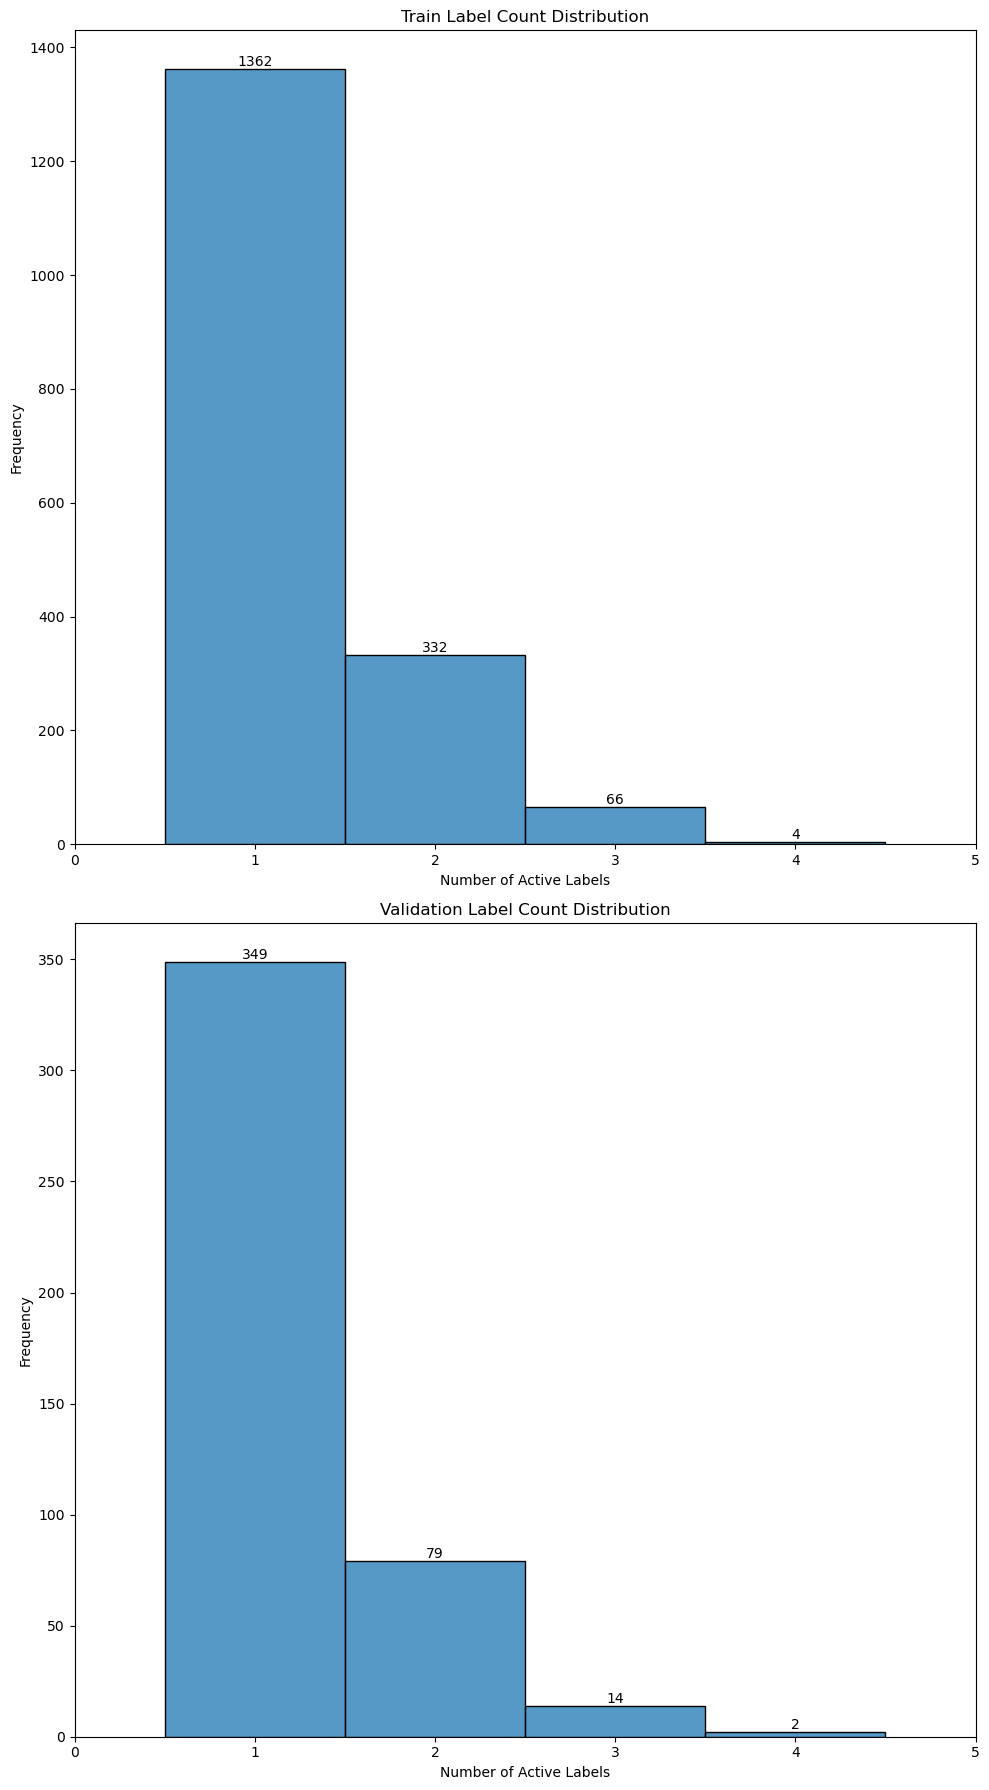

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datasets = {
    'Train': './data/fundus/MuReD/train_data.csv',
    'Validation': './data/fundus/MuReD/test_data.csv',
}

plt.figure(figsize=(10, 18))

for i, (set_name, file_path) in enumerate(datasets.items(), 1):
    df = pd.read_csv(file_path)
    label_counts = df.drop('ID', axis=1).sum(axis=1)
    count_frequencies = label_counts.value_counts().sort_index()

    plt.subplot(2, 1, i)
    # sns.histplot(label_counts, bins=range(int(label_counts.max()) + 2), kde=False)
    sns.histplot(label_counts, bins=range(6), kde=False, discrete=True)
    plt.title(f'{set_name} Label Count Distribution')
    plt.xlabel('Number of Active Labels')
    plt.ylabel('Frequency')
    # plt.xticks(range(int(label_counts.max()) + 1))
    plt.xticks(range(6))

    for index, value in count_frequencies.items():
        plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('./data/fundus/MuReD/train_data.csv')

# Calculate the sum of labels for each row (excluding the ID column)
label_counts = df.drop('ID', axis=1).sum(axis=1)

# Filter to find rows where the label count equals 4
ids_with_four_labels = df.loc[label_counts == 4, 'ID']

# Print the IDs
print(ids_with_four_labels)

800        980
882       1096
1485    im0007
1754    im0381
Name: ID, dtype: object


/home/tcl/anaconda3/envs/multilabel/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tcl/anaconda3/envs/multilabel/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


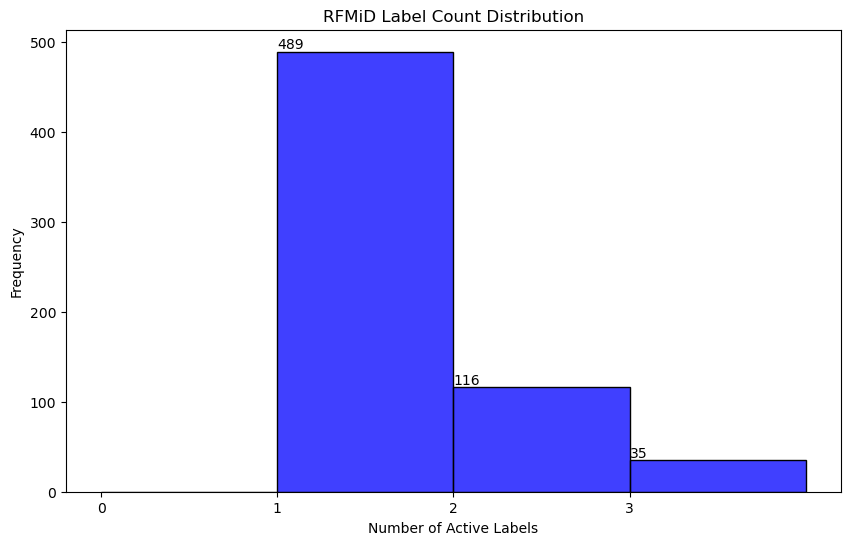

In [8]:
# df = pd.read_csv('./data/fundus/RFMiD/Training_Set/new_RFMiD_Training_Labels.csv')
df = pd.read_csv('./data/fundus/RFMiD/Evaluation_Set/new_RFMiD_Validation_Labels.csv')

label_counts = df.drop('ID', axis=1).sum(axis=1)
count_frequencies = label_counts.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.histplot(label_counts, bins=range(int(label_counts.max())+2), kde=False, color='blue')
plt.title('RFMiD Label Count Distribution')
plt.xlabel('Number of Active Labels')
plt.ylabel('Frequency')
plt.xticks(range(int(label_counts.max())+1))
# plt.grid(True)

for index, value in count_frequencies.items():
    plt.text(index, value, str(value), ha='left', va='bottom')

plt.show()

/home/tcl/anaconda3/envs/multilabel/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tcl/anaconda3/envs/multilabel/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tcl/anaconda3/envs/multilabel/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tcl/anaconda3/envs/multilabel/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

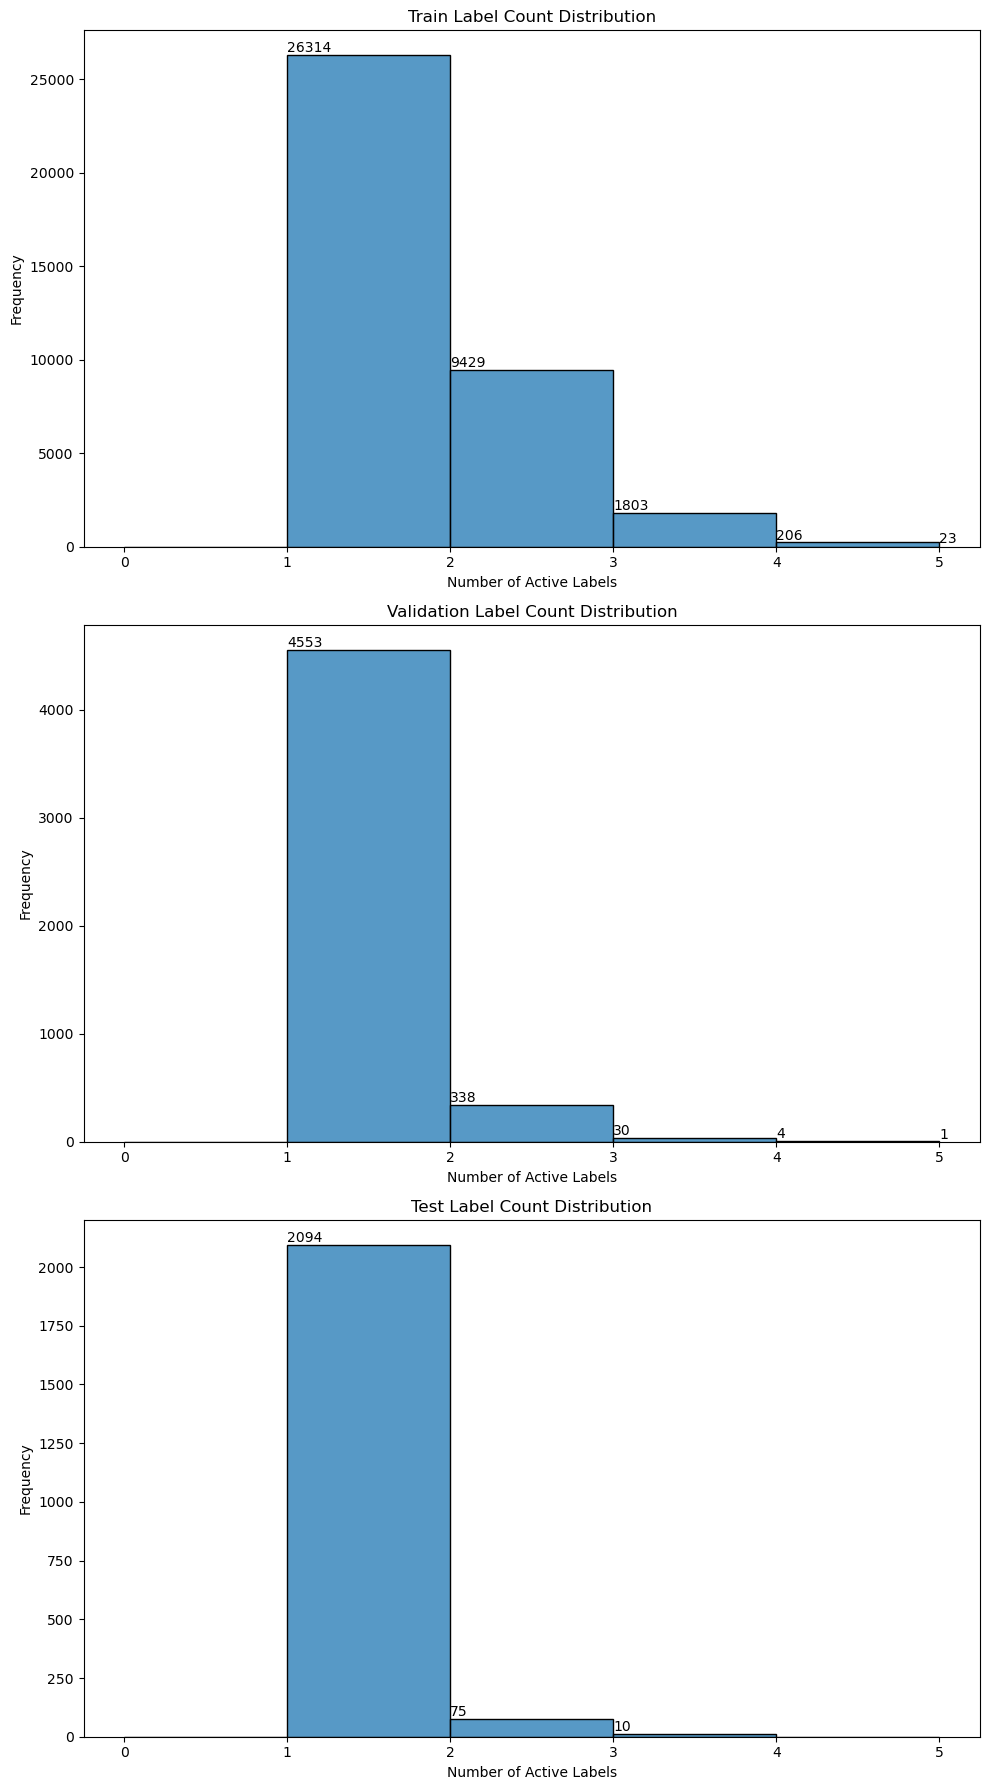

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datasets = {
    'Train': './data/fundus/ITRI/train_itri.csv',
    'Validation': './data/fundus/ITRI/valid_itri.csv',
    'Test': './data/fundus/ITRI/test_itri.csv'
}

plt.figure(figsize=(10, 18))  # 整体图的大小

for i, (set_name, file_path) in enumerate(datasets.items(), 1):
    df = pd.read_csv(file_path)
    label_counts = df.drop('path', axis=1).sum(axis=1)
    count_frequencies = label_counts.value_counts().sort_index()

    # 创建子图
    plt.subplot(3, 1, i)
    # sns.histplot(label_counts, bins=range(int(label_counts.max()) + 2), kde=False)
    sns.histplot(label_counts, bins=range(6), kde=False)
    plt.title(f'{set_name} Label Count Distribution')
    plt.xlabel('Number of Active Labels')
    plt.ylabel('Frequency')
    # plt.xticks(range(int(label_counts.max()) + 1))
    plt.xticks(range(6))

    # 在条形图上添加数字
    for index, value in count_frequencies.items():
        plt.text(index, value, str(value), ha='left', va='bottom')

# 显示整个图
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

# Image data statistics (mean, std)

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
import numpy as np

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

dataset1 = datasets.ImageFolder('path_to_image_folder_1', transform=transform)
dataset2 = datasets.ImageFolder('path_to_image_folder_2', transform=transform)

combined_dataset = ConcatDataset([dataset1, dataset2])
combined_dataloader = DataLoader(combined_dataset, batch_size=10, shuffle=False)

def compute_mean_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0

    for images, _ in loader:
        batch_samples = images.size(0)
        images = images.view(batch_samples, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images_count += batch_samples

    mean /= total_images_count
    std /= total_images_count

    return mean, std

mean, std = compute_mean_std(combined_dataloader)
print(f"Computed Mean: {mean}, Computed Std: {std}")
